In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
train = pd.read_csv('titanic_train.csv')

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
# use seaborn to see the missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

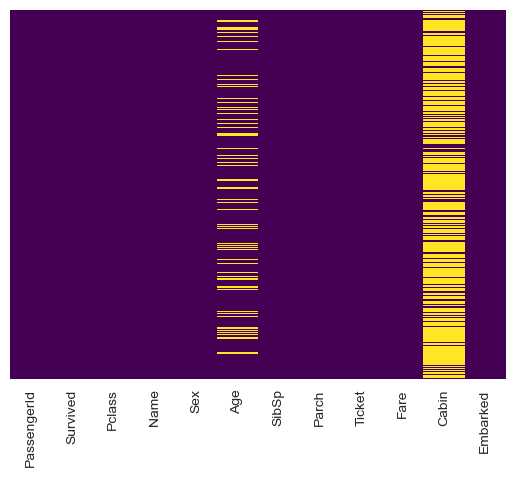

In [97]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap='viridis')
# so, we are missing some age information, and a lot of cabin information.

In [98]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

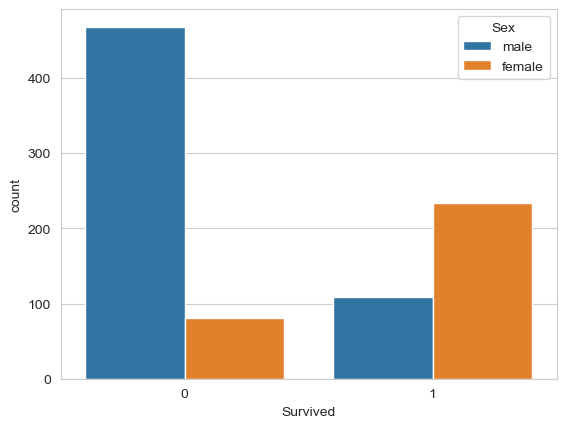

In [99]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

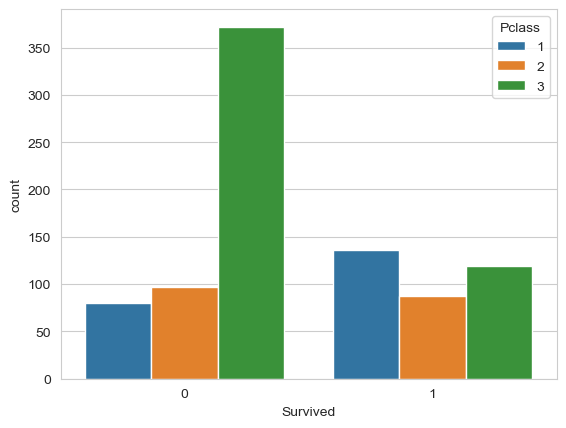

In [100]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

/Users/aaryan/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

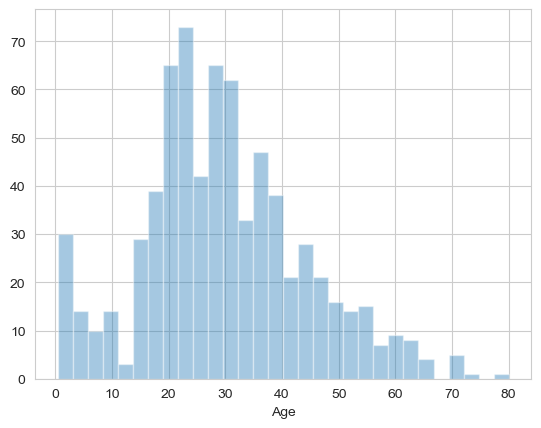

In [101]:
# Lets see a distribution of the age:
sns.distplot(train["Age"].dropna(), bins = 30, kde = False)
# Interesting to see a bimodal distribution.

Dealing with the missing data

In [102]:
# to fill the age column:
# we can fill in the mean age in the missing parts, but a clever way to do it, is by filling the age according to the passanger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

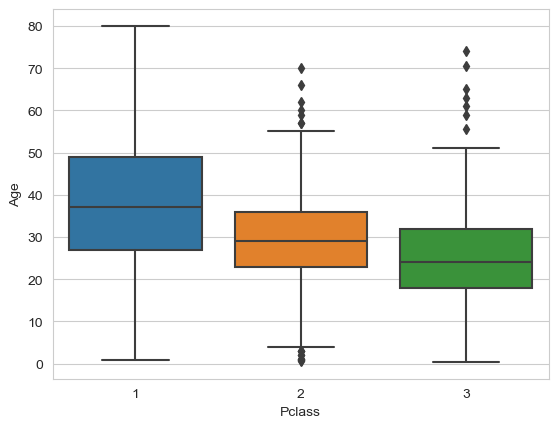

In [103]:
sns.boxplot(data = train, x = 'Pclass', y ='Age')

In [104]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [105]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

<AxesSubplot:>

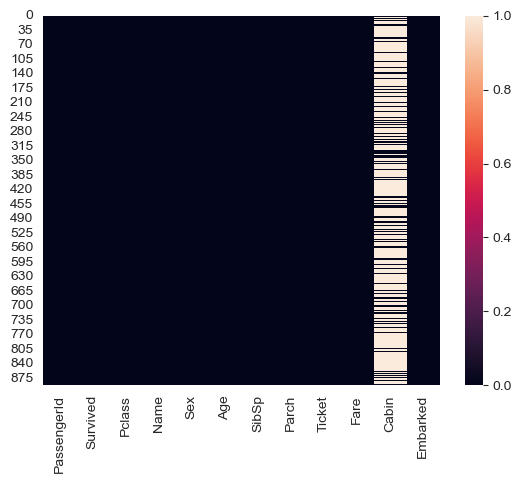

In [106]:
sns.heatmap(pd.isnull(train))
#train.drop("AgeN", axis=1, inplace = True)

In [107]:
train.drop("Cabin", axis=1, inplace = True)

<AxesSubplot:>

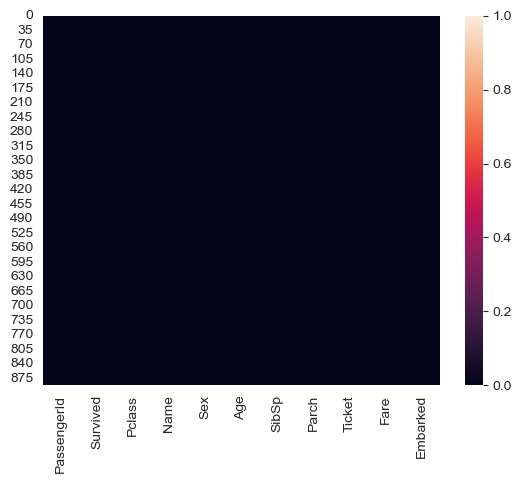

In [108]:
sns.heatmap(pd.isnull(train))


In [109]:
train.dropna(inplace=True)

In [110]:
# Dealing with categorial values into dummy values.

In [111]:
pd.get_dummies(train["Sex"])
# the problem with this, our one column is a perfect predictor of the other column.

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [112]:
# SO, we drop a column
sex = pd.get_dummies(train["Sex"], drop_first = True)


In [113]:
embark = pd.get_dummies(train["Embarked"], drop_first = True)



In [114]:
pd.concat([train, sex, embark], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [115]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [116]:
# drop the useless columns now:
train.drop(["Sex","Embarked","Ticket","Name"], axis = 1, inplace = True)

In [117]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [118]:
train.drop(["PassengerId"], inplace=True, axis = 1)

In [119]:
# We are using the teaing set as the entire dataset as we have cleaned it already.


In [120]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 ,random_state=101)

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

In [136]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [137]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [138]:
predictions = logmodel.predict(X_test)

In [139]:
from sklearn.metrics import classification_report

In [140]:
 print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       163
           1       0.72      0.49      0.58       104

    accuracy                           0.73       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.73      0.73      0.71       267



In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
 print(confusion_matrix(y_test,predictions))

[[143  20]
 [ 53  51]]
